In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from math import * 

print("The current directory is: ")
print(os.getcwd())
if not os.getcwd().endswith("Abaqus-Hardening-Seq-2-Seq-Project"):
    # Move up two directories
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
print("The current directory is: ")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project\notebooks\CP1000_RD_20C
The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from configs.chosen_project import *
from src.stage1_global_configs import *

chosen_project_path = "configs/global_config_CP1000_RD_20C.json"

global_configs = main_global_configs(chosen_project_path)

all_paths = global_configs['all_paths']
objectives = global_configs['objectives']
results_iter_common_path = all_paths["results_iter_common_path"]
targets_path = all_paths["targets_path"]


START RUNNING FROM *** 2024-09-03 18:37:59 ***

= Stage 1: Loading configs and all paths =

Welcome to Abaqus Seq2Seq flow curve calibration project

The configurations you have chosen: 

+--------------------------+------------------------------------------------------------------+
|      Global Configs      |                           User choice                            |
+--------------------------+------------------------------------------------------------------+
|         PROJECT          |                          CP1000_RD_20C                           |
|        OBJECTIVES        |        CHD2, CHD4, NDBR2p5, NDBR6, NDBR15, NDBR40, SH115         |
|       PROJECT_PATH       | c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project |
|    TRAINING_DATA_PATH    |                   training_data/CP1000_RD_20C                    |
|         LOG_PATH         |                        log/CP1000_RD_20C                         |
|       MODELS_PATH        |               

### Plot iteration true and synthetic sampled flow curves at an iteration

{'c1': 0.07871654982873291, 'c2': 1563240821.8069534, 'c3': 1e-05, 'c4': 0.4892291312749373, 'c5': 932743951.3409605, 'c6': 214039217.68258584, 'c7': 41.72354793265487}
{'c1': 0.07998916255486017, 'c2': 1545321642.6151614, 'c3': 9e-05, 'c4': 0.47408237980742257, 'c5': 939396217.8636258, 'c6': 213995817.24858147, 'c7': 37.754428241457965}
{'c1': 0.09642052686850332, 'c2': 1532722716.6259015, 'c3': 9e-05, 'c4': 0.49025014148503937, 'c5': 888958513.4865819, 'c6': 216415441.44482344, 'c7': 39.3008437056126}
{'c1': 0.09314769414017603, 'c2': 1581443203.8307736, 'c3': 2.0900109001089967e-05, 'c4': 0.5, 'c5': 903043054.3319905, 'c6': 218316660.45701355, 'c7': 39.82916898886543}
{'c1': 0.06601782284146304, 'c2': 1553107320.47194, 'c3': 9e-05, 'c4': 0.48734211240474856, 'c5': 950617530.0767479, 'c6': 204937726.66767567, 'c7': 43.27416343880993}
{'c1': 0.09581812084444308, 'c2': 1522845417.8529136, 'c3': 1e-05, 'c4': 0.4960081990656152, 'c5': 904270666.6081132, 'c6': 201576493.05533955, 'c7': 42

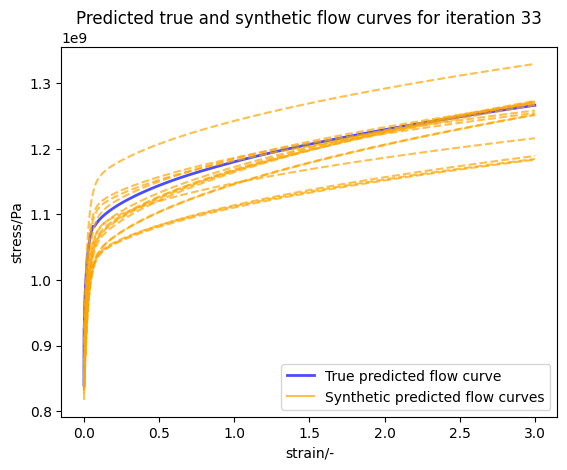

In [4]:
iteration = 33

if os.path.exists(f"{results_iter_common_path}/iteration_common/iteration_{iteration}_predicted_flow_curves.npy"):
    flow_curves_iteration = np.load(f"{results_iter_common_path}/iteration_common/iteration_{iteration}_predicted_flow_curves.npy", allow_pickle=True).tolist()
    params_iteration = np.load(f"{results_iter_common_path}/iteration_common/iteration_{iteration}_predicted_parameters.npy", allow_pickle=True).tolist()
    for index, (params_tuple, flow_curve) in enumerate(flow_curves_iteration.items()):
        stress = flow_curve['stress']
        strain = flow_curve['strain']
        print(params_iteration[index])
        if index == 0:
            plt.plot(strain, stress, color="blue", alpha=0.7, label="True predicted flow curve", linewidth=2)
        else:
            plt.plot(strain, stress, color="orange", alpha=0.7, linestyle="--")
    plt.plot([], [], color="orange", alpha=0.7, label="Synthetic predicted flow curves")
    plt.legend()
    plt.xlabel("strain/-")
    plt.ylabel("stress/Pa")
    plt.title(f"Predicted true and synthetic flow curves for iteration {iteration}")

### Plot iteration true predicted flow curves for some defined iterations

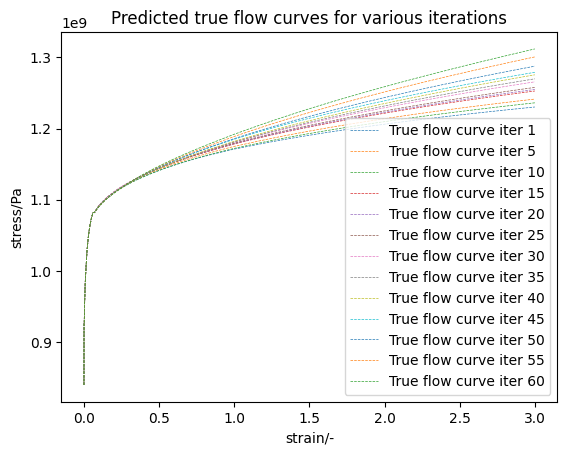

In [5]:
iterations = [1,5,10,15,20,25,30,35,40,45,50,55, 60]

for iteration in iterations:
    if os.path.exists(f"{results_iter_common_path}/iteration_common/iteration_{iteration}_predicted_flow_curves.npy"):
        flow_curves_iteration = np.load(f"{results_iter_common_path}/iteration_common/iteration_{iteration}_predicted_flow_curves.npy", allow_pickle=True).tolist()
        params_iteration = np.load(f"{results_iter_common_path}/iteration_common/iteration_{iteration}_predicted_parameters.npy", allow_pickle=True).tolist()
        for index, (params_tuple, flow_curve) in enumerate(flow_curves_iteration.items()):
            stress = flow_curve['stress']
            strain = flow_curve['strain']
            #print(params_iteration[index])
            if index == 0:
                plt.plot(strain, stress, alpha=1.0, label=f"True flow curve iter {iteration}", linewidth=0.5, linestyle="--")

        #plt.plot([], [], color="orange", alpha=0.7, label="Synthetic predicted FD curves")
        plt.legend()
        plt.xlabel("strain/-")
        plt.ylabel("stress/Pa")
        plt.title(f"Predicted true flow curves for various iterations")

### Plot true predicted flow curves and synthetic predicted flow curves

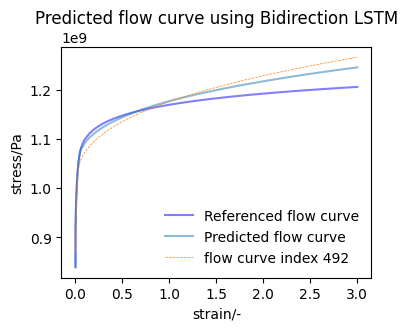

In [12]:
synthetic_flow_curve_index = 492

plt.figure(figsize=(4,3))
referenced_flow_curve = pd.read_csv(f"{targets_path}/referenced_flow_curve.csv")
plt.plot(referenced_flow_curve['strain/-'], referenced_flow_curve['stress/Pa'], color="blue", alpha=0.5, label="Referenced flow curve")

if os.path.exists(f"{results_iter_common_path}/iteration_predicted_flow_curves.npy"):
    flow_curves_iteration = np.load(f"{results_iter_common_path}/iteration_predicted_flow_curves.npy", allow_pickle=True).tolist()
    params_iteration = np.load(f"{results_iter_common_path}/iteration_predicted_parameters.npy", allow_pickle=True).tolist()
    for index, (params_tuple, flow_curve) in enumerate(flow_curves_iteration.items()):
        stress = flow_curve['stress']
        strain = flow_curve['strain']
        #print(params_iteration[index])
        if index == (synthetic_flow_curve_index % 16) * 16:
            plt.plot(strain, stress, alpha=0.5, label="Predicted flow curve")
        if index == synthetic_flow_curve_index:
            flow_curve_df = pd.DataFrame()
            flow_curve_df['stress/Pa'] = stress
            flow_curve_df['strain/-'] = strain
            flow_curve_df['stress/MPa'] = stress / 1e6
            flow_curve_df.to_excel(f"synthetic_flow_curve_{synthetic_flow_curve_index}.xlsx", index=False)
            plt.plot(strain, stress, alpha=1.0, label=f"flow curve index {synthetic_flow_curve_index}", linewidth=0.5, linestyle="--")
        
    #plt.plot([], [], color="orange", alpha=0.7, label="Synthetic predicted FD curves")
    plt.legend(frameon=False, loc=4)
    plt.xlabel("strain/-")
    plt.ylabel("stress/Pa")
    plt.title(f"Predicted flow curve using Bidirection LSTM")

### Plotting iteration FD curves

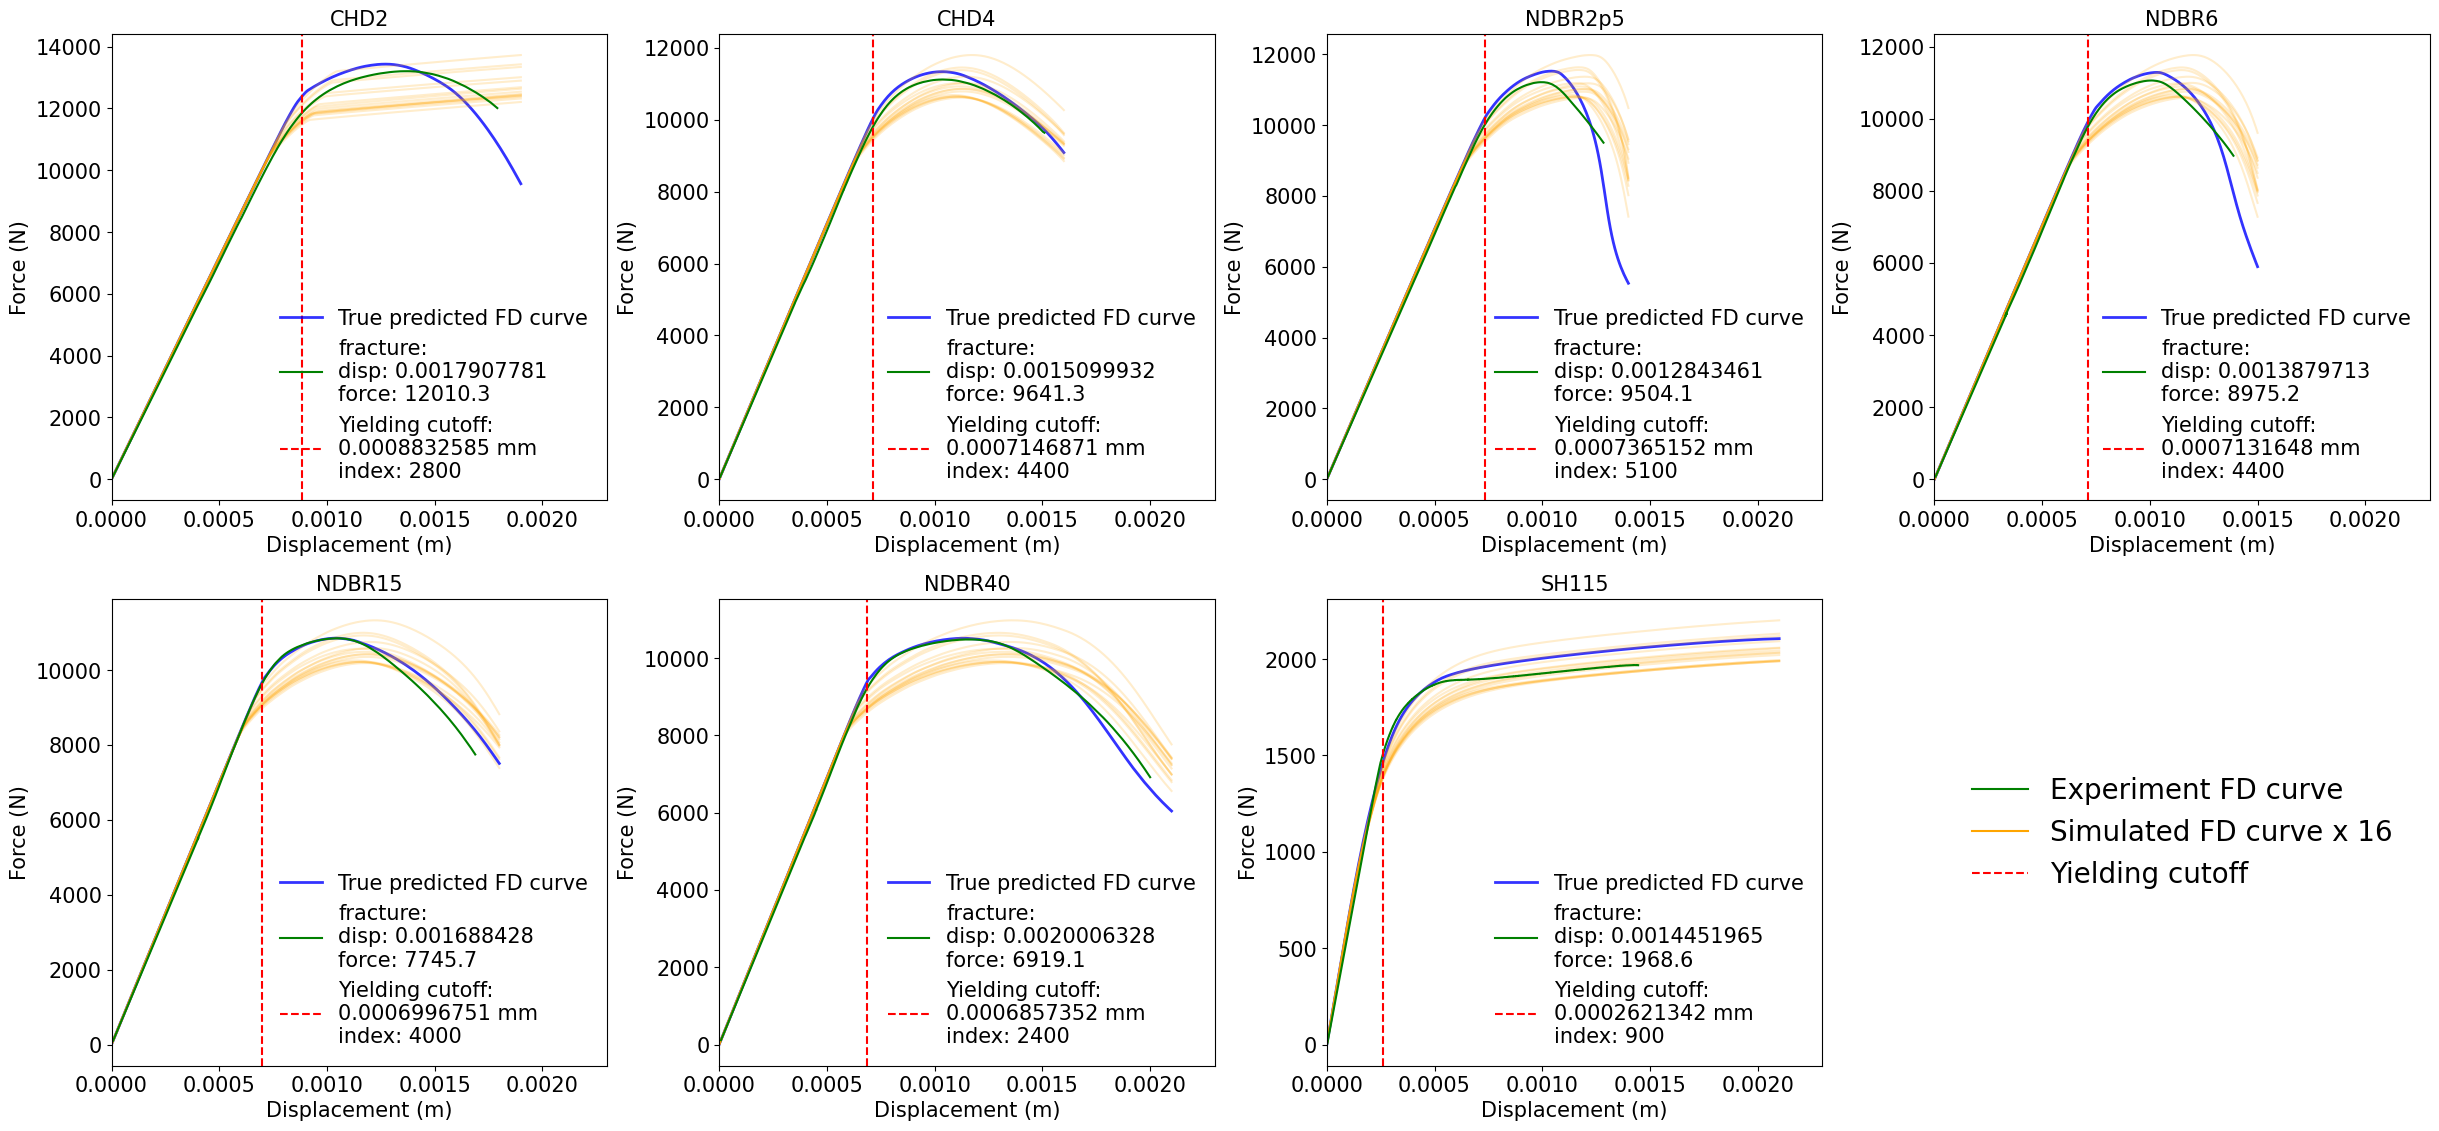

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25, 12))
fig.tight_layout(pad=5.0)
ax = ax.ravel()

exp_yielding_index = global_configs["exp_yielding_index"] 

iteration = 20
for i, objective in enumerate(objectives):
    if os.path.exists(f"{results_iter_common_path}/{objective}/FD_curves_iteration_{iteration}.npy"):
        FD_curves = np.load(f"{results_iter_common_path}/{objective}/FD_curves_iteration_{iteration}.npy", allow_pickle=True).tolist()
        for prediction_index, (params_tuple, FD_curve) in enumerate(FD_curves.items()):
            sim_displacement = FD_curve['displacement'] # displacement is in m
            sim_force = FD_curve['force']
            if prediction_index == 0:
                ax[i].plot(sim_displacement, sim_force, color='blue', alpha=0.8, label="True predicted FD curve", linewidth=2)
            else:
                ax[i].plot(sim_displacement, sim_force, color='orange', alpha=0.2)
    
    
    FD_curve_final = pd.read_excel(f"{targets_path}/{objective}/FD_curve_final.xlsx", engine='openpyxl')
    exp_displacement = FD_curve_final['displacement/m']
    exp_force = FD_curve_final['force/N']
    fracture_disp = exp_displacement.iloc[-1]
    fracture_force = exp_force.iloc[-1]
    fracture_disp = round(fracture_disp, 10)
    fracture_force = round(fracture_force, 1)

    ax[i].plot(exp_displacement, exp_force, label=f"fracture:\ndisp: {fracture_disp}\nforce: {fracture_force}",
               color='green')
    
    yielding_index = exp_yielding_index[objective]
    ax[i].axvline(x = exp_displacement[yielding_index], color='r', linestyle='--', 
                  label=f"Yielding cutoff:\n{round(exp_displacement[yielding_index], 10)} mm\nindex: {yielding_index}")

    ax[i].set_title(f"{objective}", fontsize=15)
    ax[i].set_xlabel("Displacement (m)", fontsize=15)
    ax[i].set_ylabel("Force (N)", fontsize=15)
    ax[i].set_xlim(0, 0.0023)
    #ax[i].set_ylim(-500, 17000)
    ax[i].set_xticks([0.0, 0.0005, 0.001, 0.0015, 0.002])
    # set fontsize for x and y ticks
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].legend(frameon=False, fontsize=15)

ax[7].axis('off')
ax[7].plot([],[],color="green", label="Experiment FD curve", alpha=1)
ax[7].plot([],[],color="orange", label=f"Simulated FD curve x {len(FD_curves)}", alpha=1)
ax[7].plot([],[],color="red", label="Yielding cutoff", linestyle='--')
ax[7].legend(frameon=False, fontsize=20,loc='center')

plt.show()

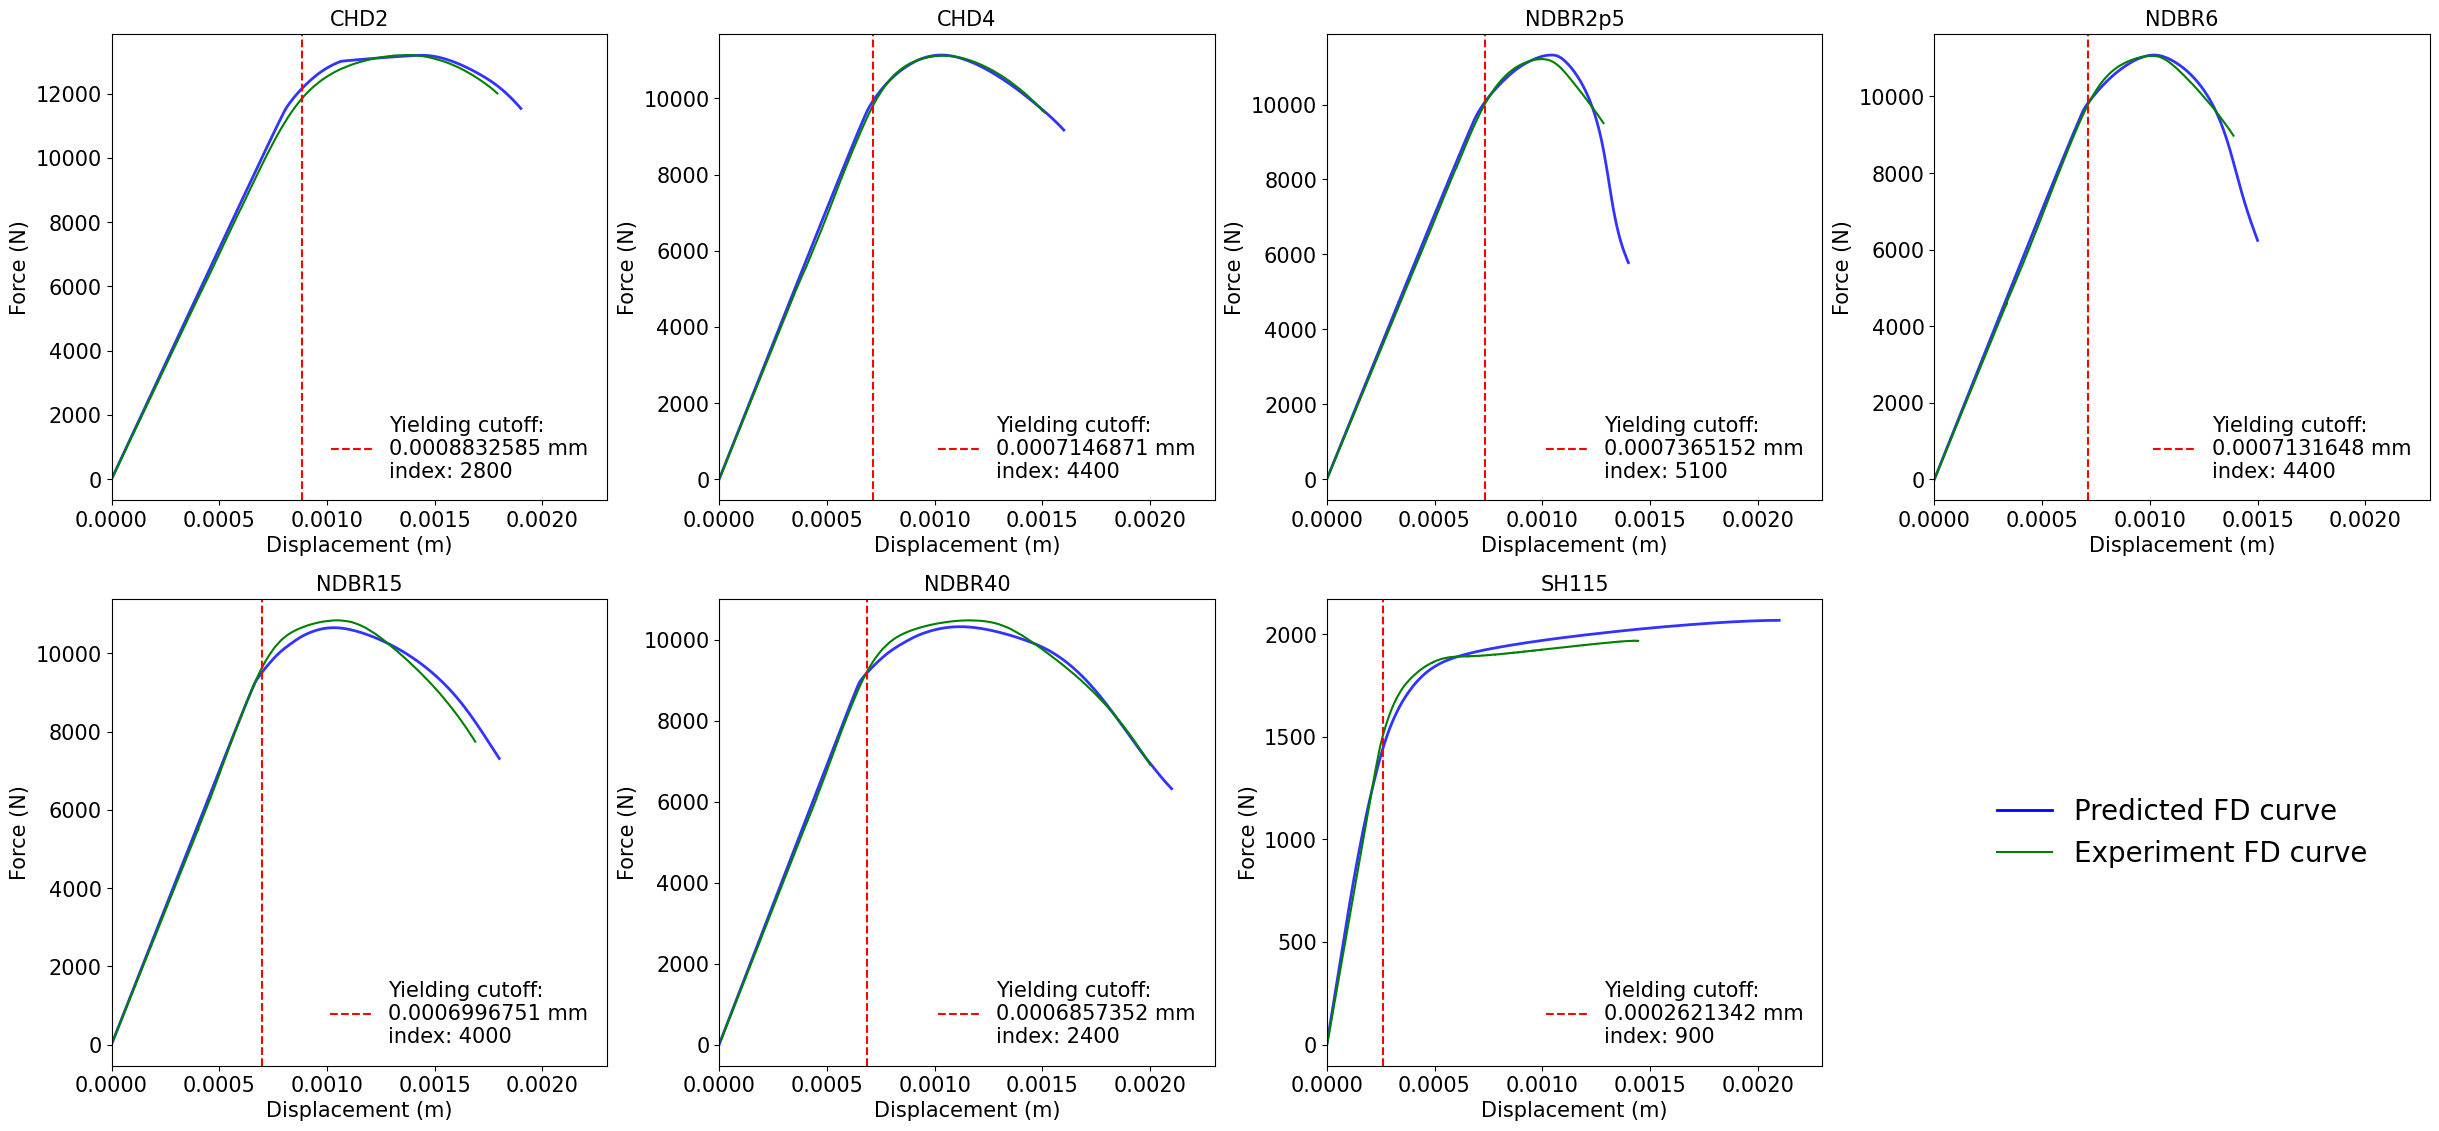

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25, 12))
fig.tight_layout(pad=5.0)
ax = ax.ravel()

exp_yielding_index = global_configs["exp_yielding_index"] 

sim_iter = 492
for i, objective in enumerate(objectives):
    if os.path.exists(f"{results_iter_common_path}/{objective}/FD_curves.npy"):
        FD_curves = np.load(f"{results_iter_common_path}/{objective}/FD_curves.npy", allow_pickle=True).tolist()
        for prediction_index, (params_tuple, FD_curve) in enumerate(FD_curves.items()):
            sim_displacement = FD_curve['displacement'] # displacement is in m
            sim_force = FD_curve['force']
            if prediction_index == sim_iter:
                ax[i].plot(sim_displacement, sim_force, color='blue', alpha=0.8, linewidth=2)
    
    
    FD_curve_final = pd.read_excel(f"{targets_path}/{objective}/FD_curve_final.xlsx", engine='openpyxl')
    exp_displacement = FD_curve_final['displacement/m']
    exp_force = FD_curve_final['force/N']
    fracture_disp = exp_displacement.iloc[-1]
    fracture_force = exp_force.iloc[-1]
    fracture_disp = round(fracture_disp, 10)
    fracture_force = round(fracture_force, 1)

    ax[i].plot(exp_displacement, exp_force,
               color='green')
    
    yielding_index = exp_yielding_index[objective]
    ax[i].axvline(x = exp_displacement[yielding_index], color='r', linestyle='--', 
                  label=f"Yielding cutoff:\n{round(exp_displacement[yielding_index], 10)} mm\nindex: {yielding_index}")

    ax[i].set_title(f"{objective}", fontsize=15)
    ax[i].set_xlabel("Displacement (m)", fontsize=15)
    ax[i].set_ylabel("Force (N)", fontsize=15)
    ax[i].set_xlim(0, 0.0023)
    #ax[i].set_ylim(-500, 17000)
    ax[i].set_xticks([0.0, 0.0005, 0.001, 0.0015, 0.002])
    # set fontsize for x and y ticks
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].legend(frameon=False, fontsize=15)

ax[7].axis('off')
ax[7].plot([],[],color='blue', alpha=1.0, label="Predicted FD curve", linewidth=2)
ax[7].plot([],[],color="green", label="Experiment FD curve", alpha=1)
ax[7].legend(frameon=False, fontsize=20,loc='center')

plt.show()

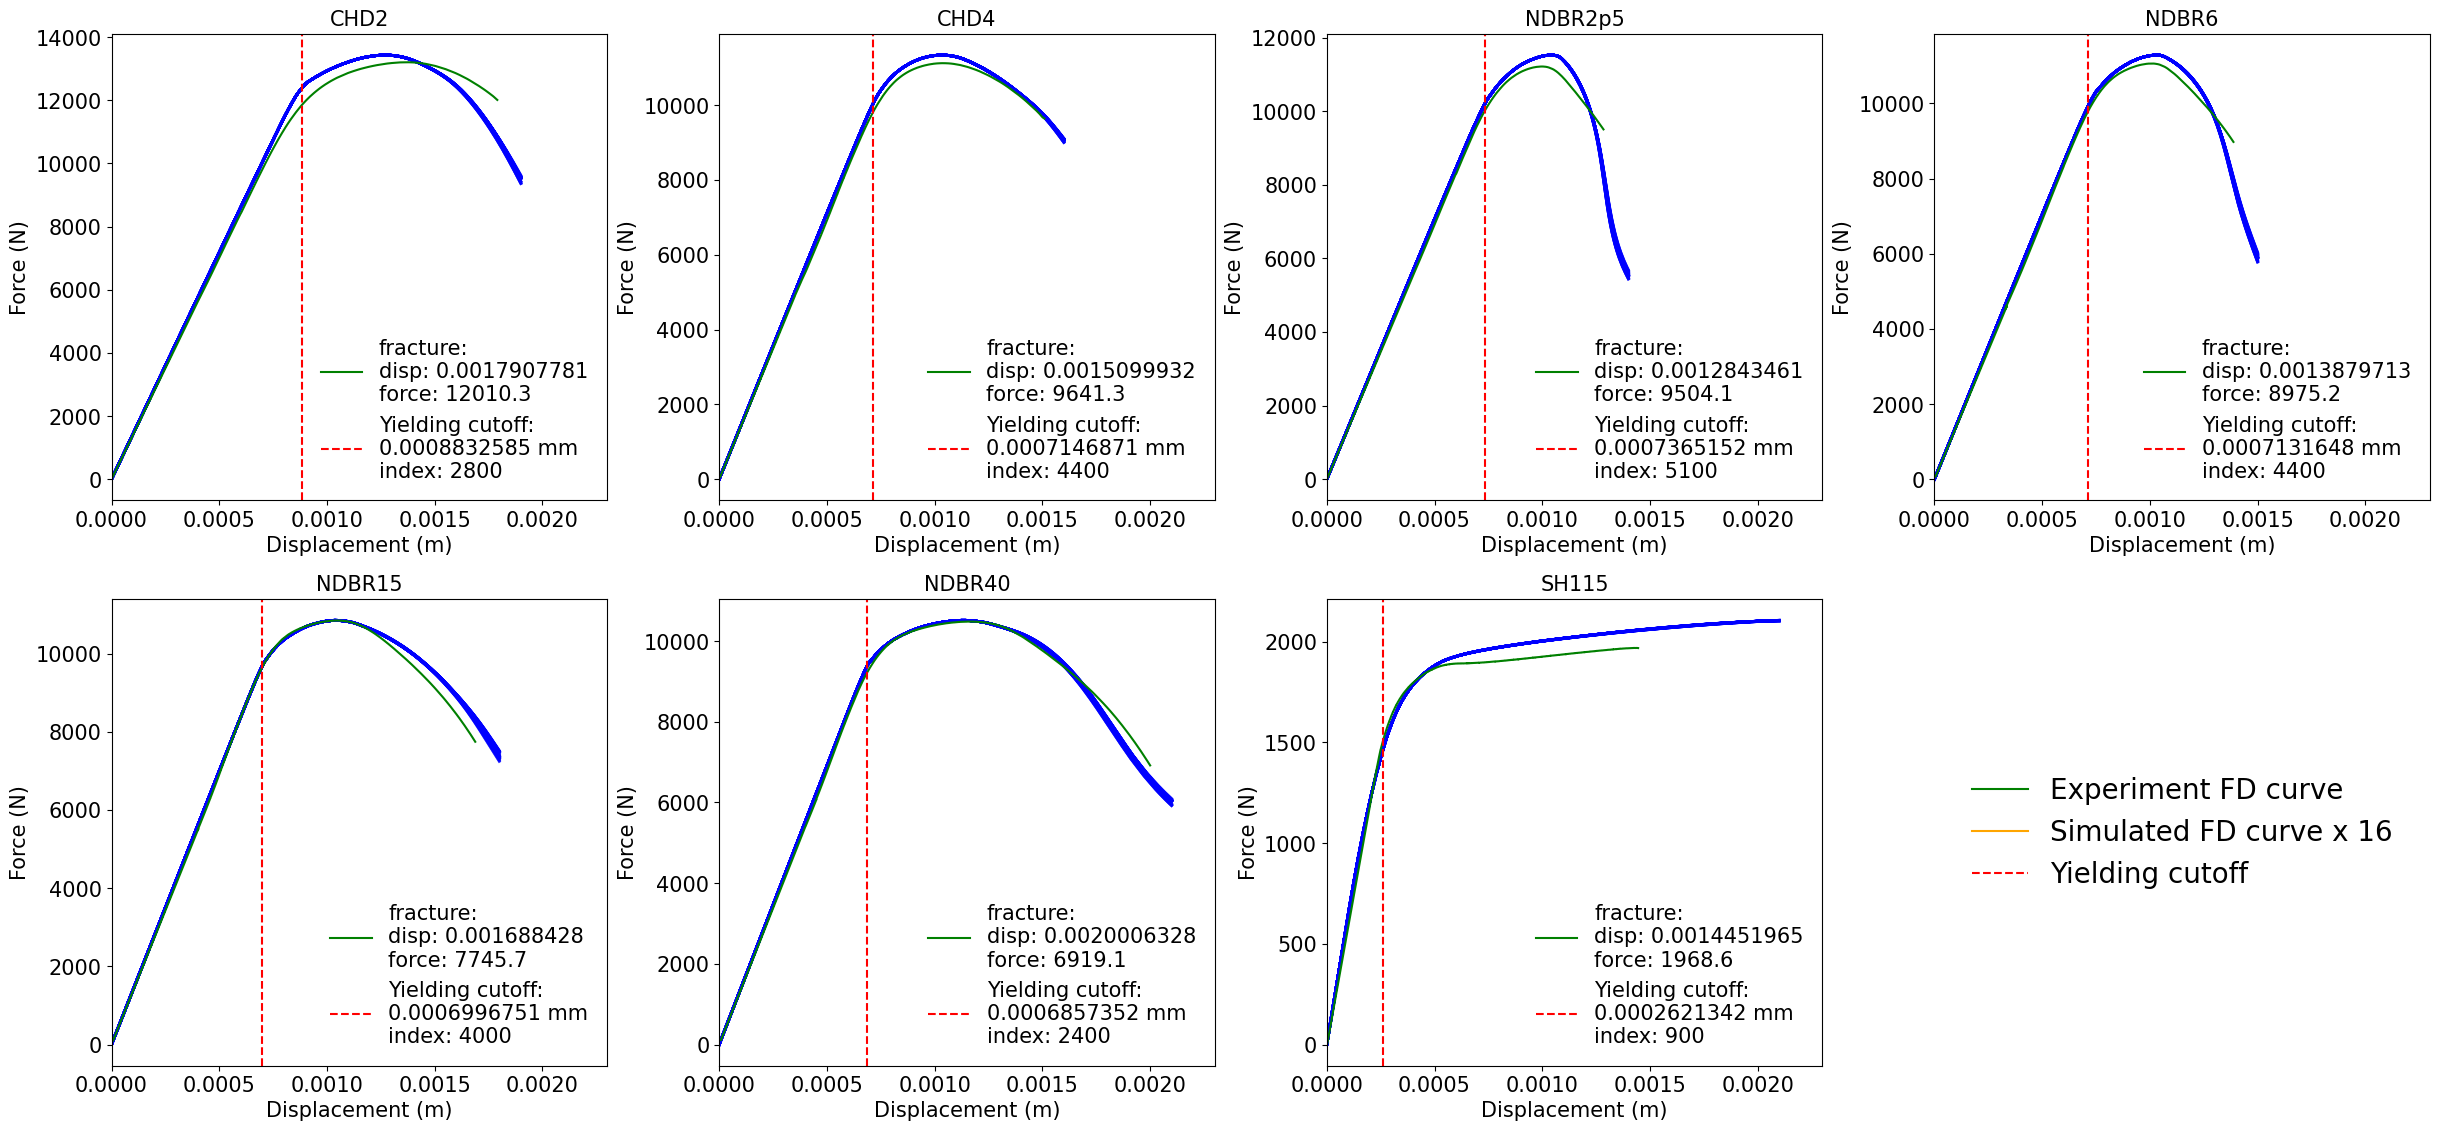

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25, 12))
fig.tight_layout(pad=5.0)
ax = ax.ravel()

exp_yielding_index = global_configs["exp_yielding_index"] 

# use glob.glob to count f"{results_iter_common_path}/{objective}/FD_curves_iteration_{iter_index}.npy"

import glob


for i, objective in enumerate(objectives):
    number_of_iters = len(glob.glob(f"{results_iter_common_path}/{objective}/FD_curves_iteration_*.npy"))
    for iter_index in range(1, number_of_iters + 1):
        FD_curves = np.load(f"{results_iter_common_path}/{objective}/FD_curves_iteration_{iter_index}.npy", allow_pickle=True).tolist()
        for prediction_index, (params_tuple, FD_curve) in enumerate(FD_curves.items()):
            sim_displacement = FD_curve['displacement'] # displacement is in m
            sim_force = FD_curve['force']
            if prediction_index == 0:
                ax[i].plot(sim_displacement, sim_force, color='blue', alpha=0.5, linewidth=2)
    
    
    FD_curve_final = pd.read_excel(f"{targets_path}/{objective}/FD_curve_final.xlsx", engine='openpyxl')
    exp_displacement = FD_curve_final['displacement/m']
    exp_force = FD_curve_final['force/N']
    fracture_disp = exp_displacement.iloc[-1]
    fracture_force = exp_force.iloc[-1]
    fracture_disp = round(fracture_disp, 10)
    fracture_force = round(fracture_force, 1)

    ax[i].plot(exp_displacement, exp_force, label=f"fracture:\ndisp: {fracture_disp}\nforce: {fracture_force}",
               color='green')
    
    yielding_index = exp_yielding_index[objective]
    ax[i].axvline(x = exp_displacement[yielding_index], color='r', linestyle='--', 
                  label=f"Yielding cutoff:\n{round(exp_displacement[yielding_index], 10)} mm\nindex: {yielding_index}")

    ax[i].set_title(f"{objective}", fontsize=15)
    ax[i].set_xlabel("Displacement (m)", fontsize=15)
    ax[i].set_ylabel("Force (N)", fontsize=15)
    ax[i].set_xlim(0, 0.0023)
    #ax[i].set_ylim(-500, 17000)
    ax[i].set_xticks([0.0, 0.0005, 0.001, 0.0015, 0.002])
    # set fontsize for x and y ticks
    ax[i].xaxis.set_tick_params(labelsize=15)
    ax[i].yaxis.set_tick_params(labelsize=15)
    ax[i].legend(frameon=False, fontsize=15)

ax[7].axis('off')
ax[7].plot([],[],color="green", label="Experiment FD curve", alpha=1)
ax[7].plot([],[],color="orange", label=f"Simulated FD curve x {len(FD_curves)}", alpha=1)
ax[7].plot([],[],color="red", label="Yielding cutoff", linestyle='--')
ax[7].legend(frameon=False, fontsize=20,loc='center')

plt.show()